# LEARNING

This notebook serves as supporting material for topics covered in **Chapter 18 - Learning from Examples** , **Chapter 19 - Knowledge in Learning**, **Chapter 20 - Learning Probabilistic Models** from the book *Artificial Intelligence: A Modern Approach*. This notebook uses implementations from [learning.py](https://github.com/aimacode/aima-python/blob/master/learning.py). Let's start by importing everything from the module:

In [1]:
from learning import *
from notebook import *
import math

## CONTENTS

* Machine Learning Overview
* Datasets
* Iris Visualization
* Distance Functions
* k-Nearest Neighbours
* Decision Tree Learner
* Random Forest Learner

## MACHINE LEARNING OVERVIEW

In this notebook, we learn about agents that can improve their behavior through diligent study of their own experiences.

An agent is **learning** if it improves its performance on future tasks after making observations about the world.

There are three types of feedback that determine the three main types of learning:

* **Supervised Learning**: In Supervised Learning the agent observes some example input-output pairs and learns a function that maps from input to output. <br/><br/>**Example**: Let's think of an agent to classify images containing cats or dogs. If we provide an image containing a cat or a dog, this agent should output a string "cat" or "dog" for that particular image. To teach this agent, we will give a lot of input-output pairs like {cat image-"cat"}, {dog image-"dog"} to the agent. The agent then learns a function that maps from an input image to one of those strings.<br/><br/>

* **Unsupervised Learning**: In Unsupervised Learning the agent learns patterns in the input even though no explicit feedback is supplied. The most common type is **clustering**: detecting potential useful clusters of input examples. <br/><br/>**Example**: A taxi agent would develop a concept of *good traffic days* and *bad traffic days* without ever being given labeled examples.<br/><br/>

* **Reinforcement Learning**: In Reinforcement Learning the agent learns from a series of reinforcements—rewards or punishments. <br/><br/>**Example**: Let's talk about an agent to play the popular Atari game—[Pong](http://www.ponggame.org). We will reward a point for every correct move and deduct a point for every wrong move from the agent. Eventually, the agent will figure out its actions prior to reinforcement were most responsible for it.<br/><br/>

In this notebook, we focus on two types of supervised learning algorithms, both of which are **non-parametric**: k-Nearest Neighbour and decision trees (as well as random decision forests). **Parametric** models have a pre-existing "shape" which they fit data to, whereas non-parametric models are shaped directly by the data itself. A parametric model is described completely by the model + learned parameters, while non-parametric models often have a more complicated or unpredictable description.

## DATASETS

For the following tutorial we will use the following datasets:

* [Fisher's Iris](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/iris.csv): Each item represents a flower, with four measurements: the length and the width of the sepals and petals. Each item/flower is categorized into one of three species: Setosa, Versicolor and Virginica.

* [Zoo](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/zoo.csv): The dataset holds different animals and their classification as "mammal", "fish", etc. The new animal we want to classify has the following measurements: 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1 (don't concern yourself with what the measurements mean).

To make using the datasets easier, we have written a class, `DataSet`, in `learning.py`. The tutorials found here make use of this class.

Let's have a look at how it works before we get started with the algorithms.

### Intro

A lot of the datasets we will work with are .csv files (although other formats are supported too). We have a collection of sample datasets ready to use [on aima-data](https://github.com/aimacode/aima-data/tree/a21fc108f52ad551344e947b0eb97df82f8d2b2b). Two examples are the datasets mentioned above (*iris.csv* and *zoo.csv*).

In such files, each line corresponds to one item/measurement. Each individual value in a line represents a *feature* and usually there is a value denoting the *class* of the item.

You can find the code for the dataset here:

In [2]:
%psource DataSet

### Class Attributes

* **examples**: Holds the items of the dataset. Each item is a list of values.

* **attrs**: The indexes of the features (by default in the range of [0,f), where *f* is the number of features). For example, `item[i]` returns the feature at index *i* of *item*.

* **attr_names**: An optional list with attribute names. For example, `item[s]`, where *s* is a feature name, returns the feature of name *s* in *item*.

* **target**: The attribute a learning algorithm will try to predict. By default the last attribute.

* **inputs**: This is the list of attributes without the target.

* **values**: A list of lists which holds the set of possible values for the corresponding attribute/feature. If initially `None`, it gets computed (by the function `setproblem`) from the examples.

* **distance**: The distance function used in the learner to calculate the distance between two items. By default `mean_boolean_error`.

* **name**: Name of the dataset.

* **source**: The source of the dataset (url or other). Not used in the code.

* **exclude**: A list of indexes to exclude from `inputs`. The list can include either attribute indexes (attrs) or names (attrnames).

### Class Helper Functions

These functions help modify a `DataSet` object to your needs.

* **sanitize**: Takes as input an example and returns it with non-input (target) attributes replaced by `None`. Useful for testing. Keep in mind that the example given is not itself sanitized, but instead a sanitized copy is returned.

* **classes_to_numbers**: Maps the class names of a dataset to numbers. If the class names are not given, they are computed from the dataset values. Useful for classifiers that return a numerical value instead of a string.

* **remove_examples**: Removes examples containing a given value. Useful for removing examples with missing values, or for removing classes (needed for binary classifiers).

### Importing a Dataset

#### Importing from aima-data

Datasets uploaded on aima-data can be imported with the following line:

In [3]:
iris = DataSet(name="iris")

To check that we imported the correct dataset, we can do the following:

In [4]:
print(iris.examples[0])
print(iris.inputs)

[5.1, 3.5, 1.4, 0.2, 'setosa']
[0, 1, 2, 3]


Which correctly prints the first line in the csv file and the list of attribute indexes.

When importing a dataset, we can specify to exclude an attribute (for example, at index 1) by setting the parameter `exclude` to the attribute index or name.

In [5]:
iris2 = DataSet(name="iris",exclude=[1])
print(iris2.inputs)

[0, 2, 3]


### Attributes

Here we showcase the attributes.

First we will print the first three items/examples in the dataset.

In [6]:
print(iris.examples[:3])

[[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa'], [4.7, 3.2, 1.3, 0.2, 'setosa']]


Then we will print `attrs`, `attrnames`, `target`, `input`. Notice how `attrs` holds values in [0,4], but since the fourth attribute is the target, `inputs` holds values in [0,3].

In [7]:
print("attrs:", iris.attrs)
print("attr_names (by default same as attrs):", iris.attr_names)
print("target:", iris.target)
print("inputs:", iris.inputs)

attrs: [0, 1, 2, 3, 4]
attr_names (by default same as attrs): [0, 1, 2, 3, 4]
target: 4
inputs: [0, 1, 2, 3]


Now we will print all the possible values for the first feature/attribute.

In [8]:
print(iris.values[0])

[4.7, 5.5, 6.3, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, 5.8, 7.0, 7.1, 4.5, 5.9, 5.6, 6.9, 6.6, 6.5, 6.4, 6.0, 6.1, 7.6, 7.4, 7.9, 4.3, 5.7, 5.3, 5.2, 6.7, 6.2, 6.8, 7.3, 7.2, 7.7]


Finally we will print the dataset's name and source. Keep in mind that we have not set a source for the dataset, so in this case it is empty.

In [9]:
print("name:", iris.name)
print("source:", iris.source)

name: iris
source: 


A useful combination of the above is `dataset.values[dataset.target]` which returns the possible values of the target. For classification problems, this will return all the possible classes. Let's try it:

In [10]:
print(iris.values[iris.target])

['versicolor', 'virginica', 'setosa']


### Helper Functions

We will now take a look at the auxiliary functions found in the class.

First we will take a look at the `sanitize` function, which sets the non-input values of the given example to `None`.

In this case we want to hide the class of the first example, so we will sanitize it.

Note that the function doesn't actually change the given example; it returns a sanitized *copy* of it.

In [11]:
print("Sanitized:",iris.sanitize(iris.examples[0]))
print("Original:",iris.examples[0])

Sanitized: [5.1, 3.5, 1.4, 0.2, None]
Original: [5.1, 3.5, 1.4, 0.2, 'setosa']


Currently the `iris` dataset has three classes, setosa, virginica and versicolor. We want though to convert it to a binary class dataset (a dataset with two classes). The class we want to remove is "virginica". To accomplish that we will utilize the helper function `remove_examples`.

In [12]:
iris2 = DataSet(name="iris")

iris2.remove_examples("virginica")
print(iris2.values[iris2.target])

['versicolor', 'setosa']


We also have `classes_to_numbers`. For a lot of the classifiers in the module (like the Neural Network), classes should have numerical values. With this function we map string class names to numbers.

In [13]:
print("Class of first example:",iris2.examples[0][iris2.target])
iris2.classes_to_numbers()
print("Class of first example:",iris2.examples[0][iris2.target])

Class of first example: setosa
Class of first example: 0


As you can see "setosa" was mapped to 0.

Finally, we take a look at `find_means_and_deviations`. It finds the means and standard deviations of the features for each class.

In [14]:
means, deviations = iris.find_means_and_deviations()

print("Setosa feature means:", means["setosa"])
print("Versicolor mean for first feature:", means["versicolor"][0])

print("Setosa feature deviations:", deviations["setosa"])
print("Virginica deviation for second feature:",deviations["virginica"][1])

Setosa feature means: [5.006, 3.418, 1.464, 0.244]
Versicolor mean for first feature: 5.936
Setosa feature deviations: [0.3524896872134513, 0.38102439795469095, 0.17351115943644546, 0.10720950308167838]
Virginica deviation for second feature: 0.32249663817263746


## IRIS VISUALIZATION

Since we will use the iris dataset extensively in this notebook, below we provide a visualization tool that helps in comprehending the dataset and thus how the algorithms work.

We plot the dataset in a 3D space using `matplotlib` and the function `show_iris` from `notebook.py`. The function takes as input three parameters, *i*, *j* and *k*, which are indices to the iris features, "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width" (0 to 3). By default we show the first three features.

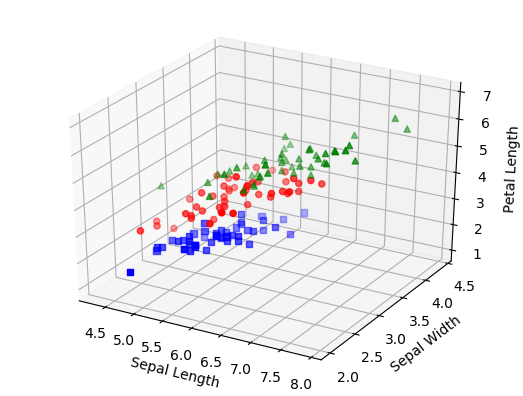

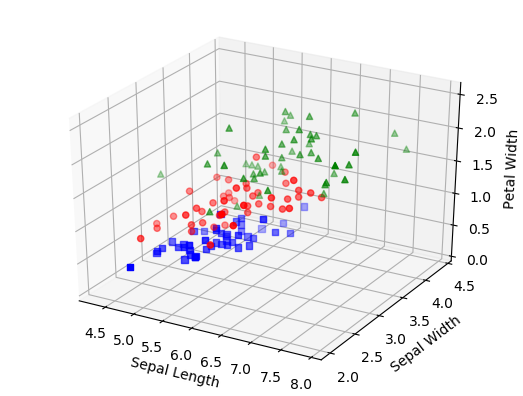

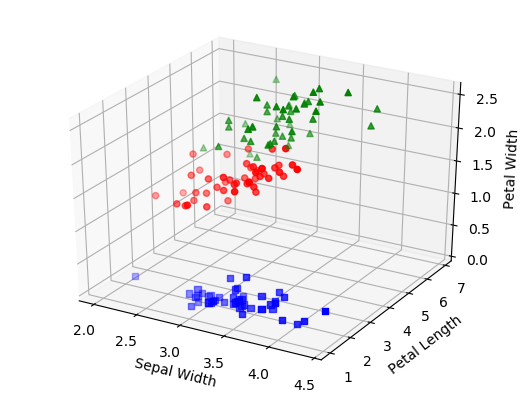

In [15]:
iris = DataSet(name="iris")

show_iris()
show_iris(0, 1, 3)
show_iris(1, 2, 3)

You can play around with the values to get a good look at the dataset.

## DISTANCE FUNCTIONS

In a lot of algorithms (like the *k-Nearest Neighbors* algorithm), there is a need to compare items, finding how *similar* or *close* they are. For that we have many different functions at our disposal. Below are the functions implemented in the module:

### Manhattan Distance (`manhattan_distance`)

One of the simplest distance functions. It calculates the difference between the coordinates/features of two items. To understand how it works, imagine a 2D grid with coordinates *x* and *y*. In that grid we have two items, at the squares positioned at `(1,2)` and `(3,4)`. The difference between their two coordinates is `3-1=2` and `4-2=2`. If we sum these up we get `4`. That means to get from `(1,2)` to `(3,4)` we need four moves; two to the right and two more up. The function works similarly for n-dimensional grids.

In [17]:
def manhattan_distance(X, Y):
    return sum([abs(x - y) for x, y in zip(X, Y)])


distance = manhattan_distance([1,2], [3,4])
print("Manhattan Distance between (1,2) and (3,4) is", distance)

Manhattan Distance between (1,2) and (3,4) is 4


### Euclidean Distance (`euclidean_distance`)

Probably the most popular distance function. It returns the square root of the sum of the squared differences between individual elements of two items.

In [18]:
def euclidean_distance(X, Y):
    return math.sqrt(sum([(x - y)**2 for x, y in zip(X,Y)]))


distance = euclidean_distance([1,2], [3,4])
print("Euclidean Distance between (1,2) and (3,4) is", distance)

Euclidean Distance between (1,2) and (3,4) is 2.8284271247461903


### Hamming Distance (`hamming_distance`)

This function counts the number of differences between single elements in two items. For example, if we have two binary strings "111" and "011" the function will return 1, since the two strings only differ at the first element. The function works the same way for non-binary strings too.

In [19]:
def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))


distance = hamming_distance(['a','b','c'], ['a','b','b'])
print("Hamming Distance between 'abc' and 'abb' is", distance)

Hamming Distance between 'abc' and 'abb' is 1


### Mean Boolean Error (`mean_boolean_error`)

To calculate this distance, we find the ratio of different elements over all elements of two items. For example, if the two items are `(1,2,3)` and `(1,4,5)`, the ration of different/all elements is 2/3, since they differ in two out of three elements.

In [20]:
def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


distance = mean_boolean_error([1,2,3], [1,4,5])
print("Mean Boolean Error Distance between (1,2,3) and (1,4,5) is", distance)

Mean Boolean Error Distance between (1,2,3) and (1,4,5) is 0.6666666666666666


### Mean Error (`mean_error`)

This function finds the mean difference of single elements between two items. For example, if the two items are `(1,0,5)` and `(3,10,5)`, their error distance is `(3-1) + (10-0) + (5-5) = 2 + 10 + 0 = 12`. The mean error distance therefore is `12/3=4`.

In [21]:
def mean_error(X, Y):
    return mean([abs(x - y) for x, y in zip(X, Y)])


distance = mean_error([1,0,5], [3,10,5])
print("Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Mean Error Distance between (1,0,5) and (3,10,5) is 4


### Mean Square Error (MSE) (`ms_error`)

This is very similar to the `Mean Error`, but instead of calculating the difference between elements, we are calculating the *square* of the differences.

In [22]:
def ms_error(X, Y):
    return mean([(x - y)**2 for x, y in zip(X, Y)])


distance = ms_error([1,0,5], [3,10,5])
print("Mean Square Distance between (1,0,5) and (3,10,5) is", distance)

Mean Square Distance between (1,0,5) and (3,10,5) is 34.666666666666664


### Root of Mean Square Error (RMSE) (`rms_error`)

This is the square root of `Mean Square Error`.

In [23]:
def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


distance = rms_error([1,0,5], [3,10,5])
print("Root of Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Root of Mean Error Distance between (1,0,5) and (3,10,5) is 5.887840577551898


## K-NEAREST NEIGHBOURS CLASSIFIER

### Overview
The k-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. We are going to use this to classify Iris flowers. More about kNN on [Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor).

![kNN plot](images/knn_plot.png)

Let's see how kNN works with a simple plot shown in the above picture.

We have co-ordinates (we call them **features** in Machine Learning) of this red star and we need to predict its class using the kNN algorithm. In this algorithm, the value of **k** is arbitrary. **k** is one of the **hyper parameters** for kNN algorithm. We choose this number based on our dataset and choosing a particular number is known as **hyper parameter tuning/optimising**. We learn more about this in coming topics.

Let's put **k = 3**. It means you need to find 3-Nearest Neighbors of this red star and classify this new point into the majority class. Observe that smaller circle which contains three points other than **test point** (red star). As there are two violet points, which form the majority, we predict the class of red star as **violet- Class B**.

Similarly if we put **k = 5**, you can observe that there are three yellow points, which form the majority. So, we classify our test point as **yellow- Class A**.

In practical tasks, we iterate through a bunch of values for k (like [1, 3, 5, 10, 20, 50, 100]), see how it performs and select the best one. 

### Implementation

Below follows the implementation of the kNN algorithm:

In [24]:
psource(NearestNeighborLearner)

It takes as input a dataset and k (default value is 1) and it returns a function, which we can later use to classify a new item.

To accomplish that, the function uses a heap-queue, where the items of the dataset are sorted according to their distance from *example* (the item to classify). We then take the k smallest elements from the heap-queue and we find the majority class. We classify the item to this class.

### Example

We measured a new flower with the following values: 5.1, 3.0, 1.1, 0.1. We want to classify that item/flower in a class. To do that, we write the following:

In [25]:
iris = DataSet(name="iris")

kNN = NearestNeighborLearner(iris,k=3)
print(kNN([5.1,3.0,1.1,0.1]))

setosa


The output of the above code is "setosa", which means the flower with the above measurements is of the "setosa" species.

## DECISION TREE LEARNER

### Overview

#### Decision Trees
A decision tree is a flowchart that uses a tree of decisions and their possible consequences for classification. At each non-leaf node of the tree an attribute of the input is tested, based on which corresponding branch leading to a child-node is selected. At the leaf node the input is classified based on the class label of this leaf node. The paths from root to leaves represent classification rules based on which leaf nodes are assigned class labels.
![decisiontree](images/decisiontree_fruit.jpg)
#### Decision Tree Learning
Decision tree learning is the construction of a decision tree from class-labeled training data. The data is expected to be a tuple in which each record of the tuple is an attribute used for classification. The decision tree is built top-down, by choosing a variable at each step that best splits the set of items. There are different metrics for measuring the "best split". These generally measure the homogeneity of the target variable within the subsets.

#### Gini Impurity
Gini impurity of a set is the probability of a randomly chosen element to be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.

$$I_G(p) = \sum{p_i(1 - p_i)} = 1 - \sum{p_i^2}$$

We select a split which minimizes the Gini impurity in child nodes.

#### Exercise: Calculate the Gini impurities in the following situation:
You currently have 26 examples that fall into Class A and 74 examples in Class B, which are currently undifferentiated. You are considering two possible splits: one on feature x, which would split the dataset into two groups: one containing 26 A's and 34 B's, and the other containing 40 B's and no A's. The other possible split is on feature y, which would split the dataset into two groups: one containing 22 A's and 5 B's, and the other containing 4 A's and 69 B's. Calculate Gini impurities to tell if either split is beneficial and which one would be preferred under an impurity minimization scheme.
<br/>-- <span style="color: blue">The Gini impurity of the original group is .74(.26) + .26(.74) = .385.
<br/>The Gini impurity after the split on x is $.6(\frac{26}{60}\frac{34}{60}+\frac{34}{60}\frac{26}{60}) + .4(0) = .295$ 
<br/>The Gini impurity after the split on y is $.27(\frac{22}{27}\frac{5}{27}+\frac{5}{27}\frac{22}{27}) + .73(\frac{4}{73}\frac{69}{73} + \frac{69}{73}\frac{4}{73}) = .157$
<br/>The second split (on y) is most beneficial.</span>


#### Information Gain
Information gain is based on the concept of entropy from information theory. Entropy is defined as:

$$H(p) = -\sum{p_i \log_2{p_i}}$$

Information Gain is difference between entropy of the parent and weighted sum of entropy of children. The feature used for splitting is the one which provides the most information gain. (Note: Gini impurity and information gain both minimize some form of entropy.)

#### Exercise: Calculate the information gain in the following situation:
You currently have 25 examples that fall into Class A, 35 examples in Class B, and 40 examples in Class C (undifferentiated). You are considering a split on feature x, which would split the dataset into two groups: one containing 25 A's and 15 B's, and the other containing 20 B's and 40 C's. What is the information gain from performing such a split?
<br/>-- <span style="color: blue">Entropy before: -.25 lg .25 - .35 lg .35 - .4 lg .4 = 1.559.
<br/>Entropy after: $.4 (-\frac{25}{40}\lg \frac{25}{40} - \frac{15}{40}\lg \frac{15}{40}) + .6 (-\frac{20}{60}\lg \frac{20}{60} - \frac{40}{60}\lg \frac{40}{60}) = .932$
<br/>Information gain: 1.559 - .932 = .627</span>

#### Decision tree learning algorithm: pseudocode

The algorithm for training a decision tree involves using information gain as the metric for selecting which attribute to test for splitting. This can be done by building a tree top-down in a recursive manner. Based on the input it makes one of the four choices:
<ol>
<li>If the input at the current step has no training data we return the mode of classes of input data received in the parent step (previous level of recursion).</li>
<li>If all values in training data belong to the same class it returns a leaf node (`DecisionLeaf`) whose class label is the class which all the data belongs to.</li>
<li>If the data has no attributes that can be tested we return the class with highest plurality value in the training data.</li>
<li>We choose the attribute which gives the highest amount of entropy gain and return a non-leaf node (`DecisionFork`) which splits based on this attribute. Each branch recursively calls `decision_tree_learning` to construct the sub-tree.</li>
</ol>

You can view the pseudocode by running the cell below:

In [26]:
pseudocode("Decision Tree Learning")

### AIMA3e
__function__ DECISION-TREE-LEARNING(_examples_, _attributes_, _parent\_examples_) __returns__ a tree  
&emsp;__if__ _examples_ is empty __then return__ PLURALITY\-VALUE(_parent\_examples_)  
&emsp;__else if__ all _examples_ have the same classification __then return__ the classification  
&emsp;__else if__ _attributes_ is empty __then return__ PLURALITY\-VALUE(_examples_)  
&emsp;__else__  
&emsp;&emsp;&emsp;_A_ &larr; argmax<sub>_a_ &isin; _attributes_</sub> IMPORTANCE(_a_, _examples_)  
&emsp;&emsp;&emsp;_tree_ &larr; a new decision tree with root test _A_  
&emsp;&emsp;&emsp;__for each__ value _v<sub>k</sub>_ of _A_ __do__  
&emsp;&emsp;&emsp;&emsp;&emsp;_exs_ &larr; \{ _e_ : _e_ &isin; _examples_ __and__ _e_._A_ = _v<sub>k</sub>_ \}  
&emsp;&emsp;&emsp;&emsp;&emsp;_subtree_ &larr; DECISION-TREE-LEARNING(_exs_, _attributes_ &minus; _A_, _examples_)  
&emsp;&emsp;&emsp;&emsp;&emsp;add a branch to _tree_ with label \(_A_ = _v<sub>k</sub>_\) and subtree _subtree_  
&emsp;&emsp;&emsp;__return__ _tree_  

---
__Figure ??__ The decision\-tree learning algorithm. The function  IMPORTANCE is described in Section __??__. The function PLURALITY\-VALUE selects the most common output value among a set of examples, breaking ties randomly.

### Implementation
The nodes of the tree constructed by our learning algorithm are stored using either `DecisionFork` or `DecisionLeaf` based on whether they are a parent node or a leaf node respectively.

In [27]:
psource(DecisionFork)

`DecisionFork` holds the attribute, which is tested at that node, and a dict of branches. The branches store the child nodes, one for each of the attribute's values. Calling an object of this class as a function with input tuple as an argument returns the next node in the classification path based on the result of the attribute test.

In [28]:
psource(DecisionLeaf)

The leaf node stores the class label in `result`. All input tuples' classification paths end on a `DecisionLeaf` whose `result` attribute decide their class.

### Exercise: Implement the recursive Decision Tree Learning algorithm above.

In [29]:
def DecisionTreeLearner(dataset):

    target, values = dataset.target, dataset.values

    def decision_tree_learning(examples, attrs, parent_examples=()):
        # From learning.py:
        if len(examples) == 0:
            return plurality_value(parent_examples)
        if all_same_class(examples):
            return DecisionLeaf(examples[0][target])
        if len(attrs) == 0:
            return plurality_value(examples)
        A = choose_attribute(attrs, examples)
        tree = DecisionFork(A, dataset.attr_names[A], plurality_value(examples))
        for (v_k, exs) in split_by(A, examples):
            subtree = decision_tree_learning(exs, remove_all(A, attrs), examples)
            tree.add(v_k, subtree)
        return tree
        

    # Helper functions:
    
    def plurality_value(examples):
        """
        Return the most popular target value for this set of examples.
        (If target is binary, this is the majority; otherwise plurality).
        """
        popular = argmax_random_tie(values[target], key=lambda v: count(target, v, examples))
        return DecisionLeaf(popular)

    def count(attr, val, examples):
        """Count the number of examples that have example[attr] = val."""
        return sum(e[attr] == val for e in examples)

    def all_same_class(examples):
        """Are all these examples in the same target class?"""
        class0 = examples[0][target]
        return all(e[target] == class0 for e in examples)

    def choose_attribute(attrs, examples):
        """Choose the attribute with the highest information gain."""
        return argmax_random_tie(attrs, key=lambda a: information_gain(a, examples))

    def information_gain(attr, examples):
        """Return the expected reduction in entropy from splitting by attr."""

        def I(examples):
            return information_content([count(target, v, examples) for v in values[target]])

        n = len(examples)
        remainder = sum((len(examples_i) / n) * I(examples_i) for (v, examples_i) in split_by(attr, examples))
        return I(examples) - remainder

    def split_by(attr, examples):
        """Return a list of (val, examples) pairs for each val of attr."""
        return [(v, [e for e in examples if e[attr] == v]) for v in values[attr]]

    return decision_tree_learning(dataset.examples, dataset.inputs)

### Example

We will now use the Decision Tree Learner to classify a sample with values: 5.1, 3.0, 1.1, 0.1.

In [30]:
iris = DataSet(name="iris")

DTL = DecisionTreeLearner(iris)
print(DTL([5.1, 3.0, 1.1, 0.1]))

setosa


As expected, the Decision Tree learner classifies the sample as "setosa" as seen in the previous section.

One advantage of decision trees is that they are human-readable and understandable. The splitting criteria at each node can be printed out, which allows the algorithm to be understood. To print out the decision tree, use the `display()` function:

In [31]:
DTL.display()

Splitting on attr  2
 2 = 1.7 ==> RESULT = setosa
 2 = 1.4 ==> RESULT = setosa
 2 = 1.6 ==> RESULT = setosa
 2 = 1.3 ==> RESULT = setosa
 2 = 1.5 ==> RESULT = setosa
 2 = 1.1 ==> RESULT = setosa
 2 = 1.2 ==> RESULT = setosa
 2 = 1.0 ==> RESULT = setosa
 2 = 1.9 ==> RESULT = setosa
 2 = 4.7 ==> RESULT = versicolor
 2 = 4.5 ==> Splitting on attr  0
     0 = 4.7 ==> RESULT = versicolor
     0 = 5.5 ==> RESULT = versicolor
     0 = 6.3 ==> RESULT = versicolor
     0 = 5.0 ==> RESULT = versicolor
     0 = 4.9 ==> RESULT = virginica
     0 = 5.1 ==> RESULT = versicolor
     0 = 4.6 ==> RESULT = versicolor
     0 = 5.4 ==> RESULT = versicolor
     0 = 4.4 ==> RESULT = versicolor
     0 = 4.8 ==> RESULT = versicolor
     0 = 5.8 ==> RESULT = versicolor
     0 = 7.0 ==> RESULT = versicolor
     0 = 7.1 ==> RESULT = versicolor
     0 = 4.5 ==> RESULT = versicolor
     0 = 5.9 ==> RESULT = versicolor
     0 = 5.6 ==> RESULT = versicolor
     0 = 6.9 ==> RESULT = versicolor
     0 = 6.6 ==> RESULT

One disadvantage of decision trees is that they are prone to **overfitting**. Overfitting is when you are too sensitive to small, random fluctuations of the training data that have little meaning / low predictive ability. The algorithm does an excellent job at correctly sorting the training data while its ability to generalize and handle unseen data suffers because it has paid too much attention to the particular idiosyncrasies of the training set. Random forests are a way to overcome this issue.

## RANDOM FOREST LEARNER

### Overview

![random_forest.png](images/random_forest.png)   
Image via [src](https://cdn-images-1.medium.com/max/800/0*tG-IWcxL1jg7RkT0.png)

#### Random Forest

As the name of the algorithm and image above suggest, this algorithm creates a forest with a number of trees. The larger number of trees makes the forest robust while also helping increase accuracy. The main difference between Random Forest and Decision trees is that, finding the root node and splitting the feature nodes will be <i>random</i>. In addition, each decision tree in a random forest is enforced to be short (shallow depth). This prevents each tree from overfitting and losing its generalizability, while having a large set of trees still allows the capture of high-dimensional data. The trees then vote in order to classify new data. Random forests are referred to as a **b**ootstrap **agg**regating (bagging) technique.

How the Random Forest Algorithm works:   

The Random Forest Algorithm works in two steps: first is the creation of random forest and then the prediction.

Creation: The first step in creation is to randomly select 'm' features out of total 'n' features. From these 'm' features calculate the node d using the best split point and then split the node into further nodes using best split. Repeat these steps until 'i' number of nodes are reached. Repeat the entire whole process to build the forest.  

Prediction: Take the test features and predict the outcome for each randomly created decision tree. Calculate the votes for each prediction and the prediction which gets the highest votes would be the final prediction.


### Implementation

Below mentioned is the implementation of Random Forest Algorithm.

In [32]:
psource(RandomForest)

This algorithm creates an ensemble of decision trees using bagging and feature bagging. It takes 'm' examples randomly from the total number of examples and then perform feature bagging with probability p to retain an attribute. All the predictors are predicted from the DecisionTreeLearner and then a final prediction is made.


### Example

We will now use the Random Forest to classify a sample with values: 5.1, 3.0, 1.1, 0.1.

In [33]:
iris = DataSet(name="iris")

DTL = RandomForest(iris)
print(DTL([5.1, 3.0, 1.1, 0.1]))

['setosa', 'setosa', 'setosa', 'setosa', 'setosa']
setosa


As expected, the Random Forest classifies the sample as "setosa".